In [3]:
import pandas as pd
import numpy as np
import random as rnd
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv(
    'https://labfile.oss.aliyuncs.com/courses/1363/Titanic.csv')  # 读取数据

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hendekovic, Mr. Ignjac",male,1601,B96 B98,S
freq,1,577,7,4,644


In [7]:
df['Age'].fillna(df['Age'].median(), inplace=True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [8]:
drop_column = ['PassengerId', 'Cabin', 'Ticket']
df_drop = df.drop(drop_column, axis=1)

In [9]:
df_drop.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [10]:
df_drop['FamilySize'] = df_drop['SibSp'] + df_drop['Parch'] + 1
df_drop['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [11]:
df_drop['IsAlone'] = 1
df_drop['IsAlone'].loc[df_drop['FamilySize'] > 1] = 0
df_drop['IsAlone'].value_counts()

1    537
0    354
Name: IsAlone, dtype: int64

In [12]:
df_drop['Title'] = df_drop['Name'].str.split(
    ", ", expand=True)[1].str.split(".", expand=True)[0]

In [13]:
df_drop['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Lady              1
Jonkheer          1
Don               1
Capt              1
Sir               1
Ms                1
Mme               1
the Countess      1
Name: Title, dtype: int64

In [14]:
stat_min = 10
# 找到少于 10 个的列名
title_names = (df_drop['Title'].value_counts() < stat_min)
# 替换列名
df_drop['Title'] = df_drop['Title'].apply(
    lambda x: 'Misc' if title_names.loc[x] == True else x)
print(df_drop['Title'].value_counts())
print("-"*10)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------


In [15]:
df_drop['AgeBin'] = pd.cut(df_drop['Age'].astype(int), 5)
df_drop['AgeBin'].value_counts()

(16.0, 32.0]     525
(32.0, 48.0]     186
(-0.08, 16.0]    100
(48.0, 64.0]      69
(64.0, 80.0]      11
Name: AgeBin, dtype: int64

In [16]:
df_drop['FareBin'] = pd.qcut(df_drop['Fare'], 4)
df_drop['FareBin'].value_counts()

(7.91, 14.454]     224
(-0.001, 7.91]     223
(14.454, 31.0]     222
(31.0, 512.329]    222
Name: FareBin, dtype: int64

In [17]:
df_drop.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,AgeBin,FareBin
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(16.0, 32.0]","(-0.001, 7.91]"
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(32.0, 48.0]","(31.0, 512.329]"
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(16.0, 32.0]","(7.91, 14.454]"
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(32.0, 48.0]","(31.0, 512.329]"
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(32.0, 48.0]","(7.91, 14.454]"


In [18]:
df_drop[['Sex', 'Survived']].groupby('Sex', as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [19]:
df_drop[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [20]:
df_drop[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [21]:
df_drop[['Title', 'Survived']].groupby('Title', as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Misc,0.444444
2,Miss,0.697802
3,Mr,0.156673
4,Mrs,0.792000


In [22]:
df_drop[['SibSp', 'Survived']].groupby('SibSp', as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [23]:
df_drop[['Parch', 'Survived']].groupby('Parch', as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


In [24]:
df_drop[['FamilySize', 'Survived']].groupby(
    'FamilySize', as_index=False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [25]:
df_drop[['IsAlone', 'Survived']].groupby('IsAlone', as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

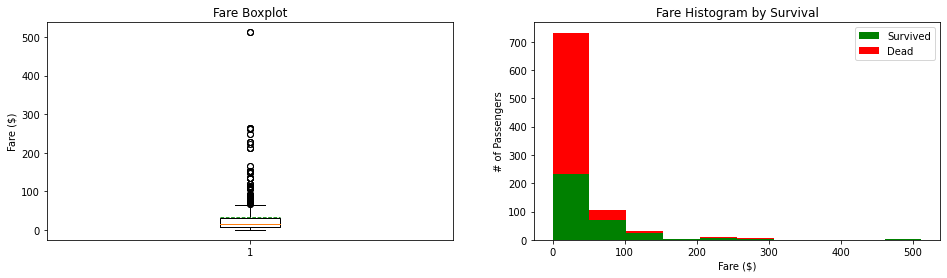

In [27]:
# 定义画布大小
plt.figure(figsize=[16, 4])
# 画第一个图
plt.subplot(121)
plt.boxplot(x=df_drop['Fare'], showmeans=True, meanline=True)
# 设置标题和 y 轴的标签
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')
# 画第二个图
plt.subplot(122)
plt.hist(x=[df_drop[df_drop['Survived'] == 1]['Fare'], df_drop[df_drop['Survived'] == 0]['Fare']],
         stacked=True, color=['g', 'r'], label=['Survived', 'Dead'])
# 设置标题和坐标轴的标签
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()

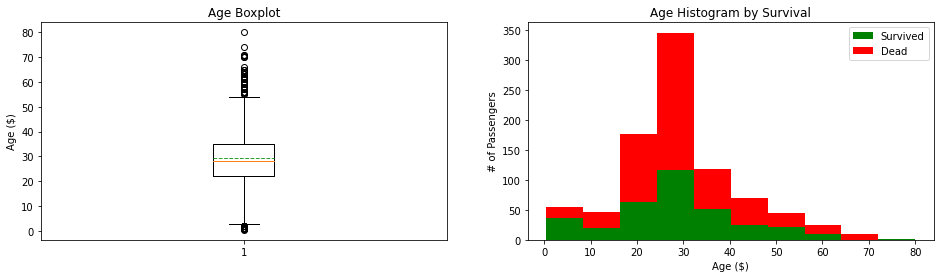

In [28]:
# 定义画布大小
plt.figure(figsize=[16, 4])
# 画第一个图
plt.subplot(121)
plt.boxplot(x=df_drop['Age'], showmeans=True, meanline=True)
plt.title('Age Boxplot')
plt.ylabel('Age ($)')
# 画第二个图
plt.subplot(122)
plt.hist(x=[df_drop[df_drop['Survived'] == 1]['Age'], df_drop[df_drop['Survived'] == 0]['Age']],
         stacked=True, color=['g', 'r'], label=['Survived', 'Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age ($)')
plt.ylabel('# of Passengers')
plt.legend()

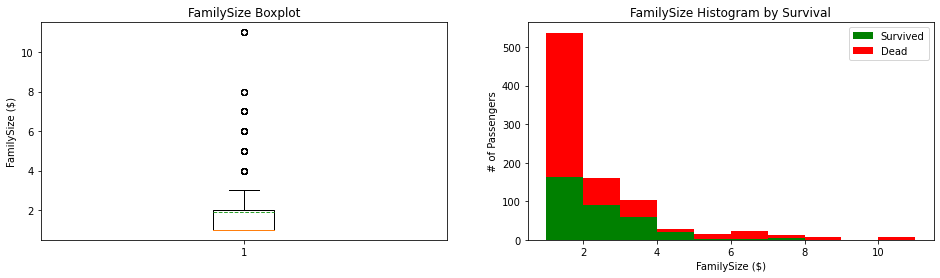

In [29]:
plt.figure(figsize=[16, 4])
# 画第一个图
plt.subplot(121)
plt.boxplot(x=df_drop['FamilySize'], showmeans=True, meanline=True)
plt.title('FamilySize Boxplot')
plt.ylabel('FamilySize ($)')
# 画第二个图
plt.subplot(122)
plt.hist(x=[df_drop[df_drop['Survived'] == 1]['FamilySize'], df_drop[df_drop['Survived'] == 0]['FamilySize']],
         stacked=True, color=['g', 'r'], label=['Survived', 'Dead'])
plt.title('FamilySize Histogram by Survival')
plt.xlabel('FamilySize ($)')
plt.ylabel('# of Passengers')
plt.legend()

<AxesSubplot:xlabel='IsAlone', ylabel='Survived'>

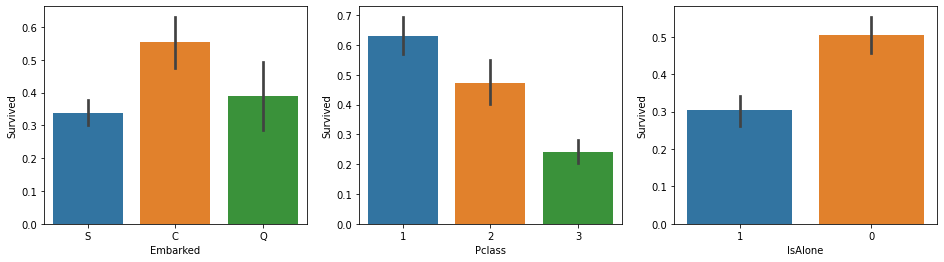

In [30]:
fig, saxis = plt.subplots(1, 3, figsize=(16, 4))
# 画柱状图
sns.barplot(x='Embarked', y='Survived', data=df_drop, ax=saxis[0])
sns.barplot(x='Pclass', y='Survived', order=[
            1, 2, 3], data=df_drop, ax=saxis[1])
sns.barplot(x='IsAlone', y='Survived', order=[1, 0], data=df_drop, ax=saxis[2])

<AxesSubplot:xlabel='FamilySize', ylabel='Survived'>

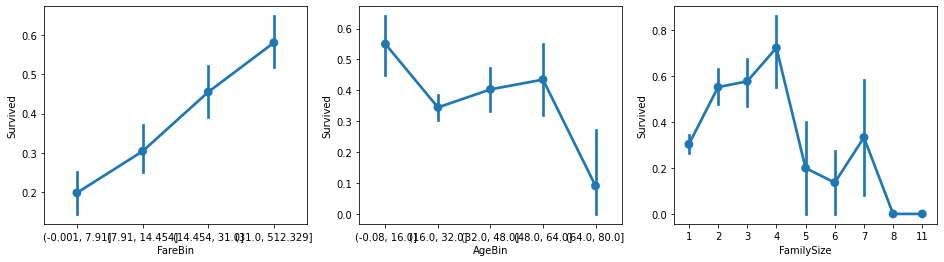

In [31]:
fig, saxis = plt.subplots(1, 3, figsize=(16, 4))
sns.pointplot(x='FareBin', y='Survived',  data=df_drop, ax=saxis[0])
sns.pointplot(x='AgeBin', y='Survived',  data=df_drop, ax=saxis[1])
sns.pointplot(x='FamilySize', y='Survived', data=df_drop, ax=saxis[2])

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

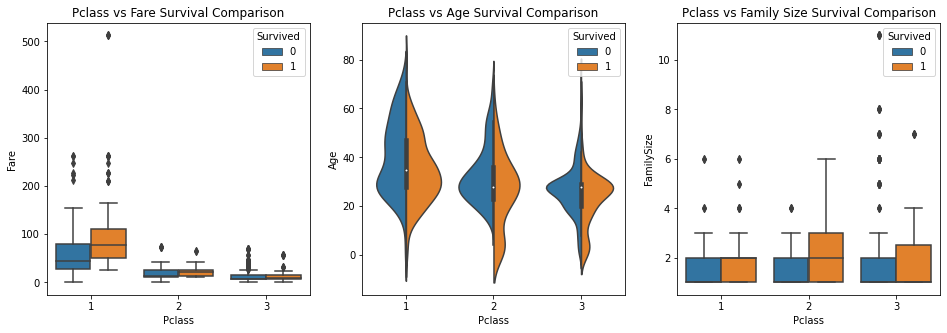

In [32]:
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(16, 5))

sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df_drop, ax=axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x='Pclass', y='Age', hue='Survived',
               data=df_drop, split=True, ax=axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x='Pclass', y='FamilySize', hue='Survived', data=df_drop, ax=axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

Text(0.5, 1.0, 'Sex vs IsAlone Survival Comparison')

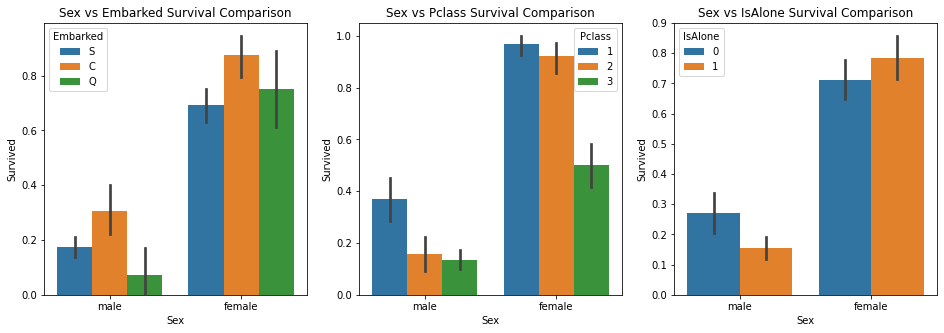

In [33]:
fig, qaxis = plt.subplots(1, 3, figsize=(16, 5))

sns.barplot(x='Sex', y='Survived', hue='Embarked', data=df_drop, ax=qaxis[0])
qaxis[0].set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df_drop, ax=qaxis[1])
qaxis[1].set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x='Sex', y='Survived', hue='IsAlone', data=df_drop, ax=qaxis[2])
qaxis[2].set_title('Sex vs IsAlone Survival Comparison')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

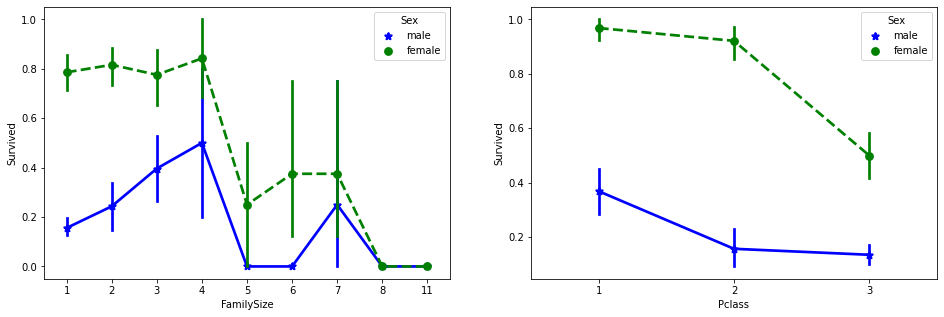

In [34]:
fig, (maxis1, maxis2) = plt.subplots(1, 2, figsize=(16, 5))


sns.pointplot(x="FamilySize", y="Survived", hue="Sex", data=df_drop,
              palette={"male": "blue", "female": "g"},
              markers=["*", "o"], linestyles=["-", "--"], ax=maxis1)

sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=df_drop,
              palette={"male": "blue", "female": "g"},
              markers=["*", "o"], linestyles=["-", "--"], ax=maxis2)

/Users/hui/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


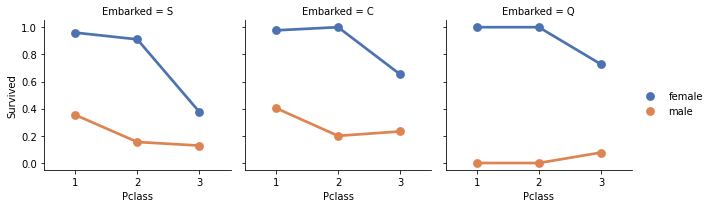

In [35]:
e = sns.FacetGrid(df_drop, col='Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=9.0, hue_order=['female','male'], palette='deep')
e.add_legend()

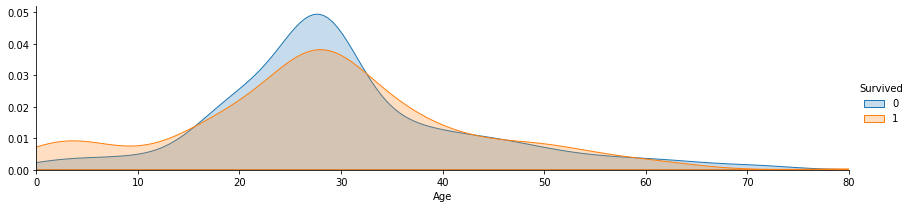

In [36]:
a = sns.FacetGrid(df_drop, hue='Survived', aspect=4)
a.map(sns.kdeplot, 'Age', shade=True)
a.set(xlim=(0, df_drop['Age'].max()))
a.add_legend()

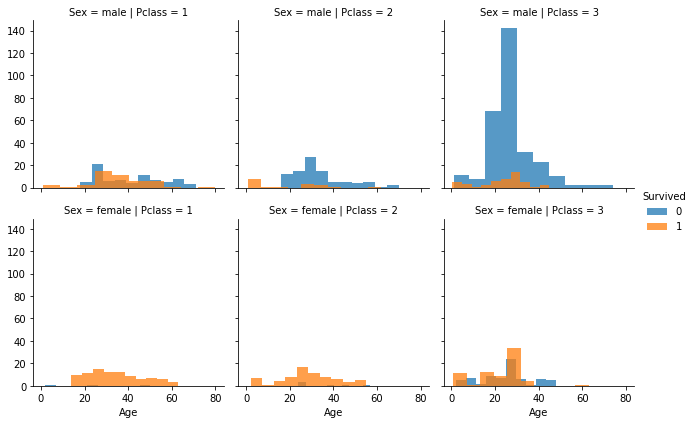

In [37]:
h = sns.FacetGrid(df_drop, row='Sex', col='Pclass', hue='Survived')
h.map(plt.hist, 'Age', alpha=.75)
h.add_legend()

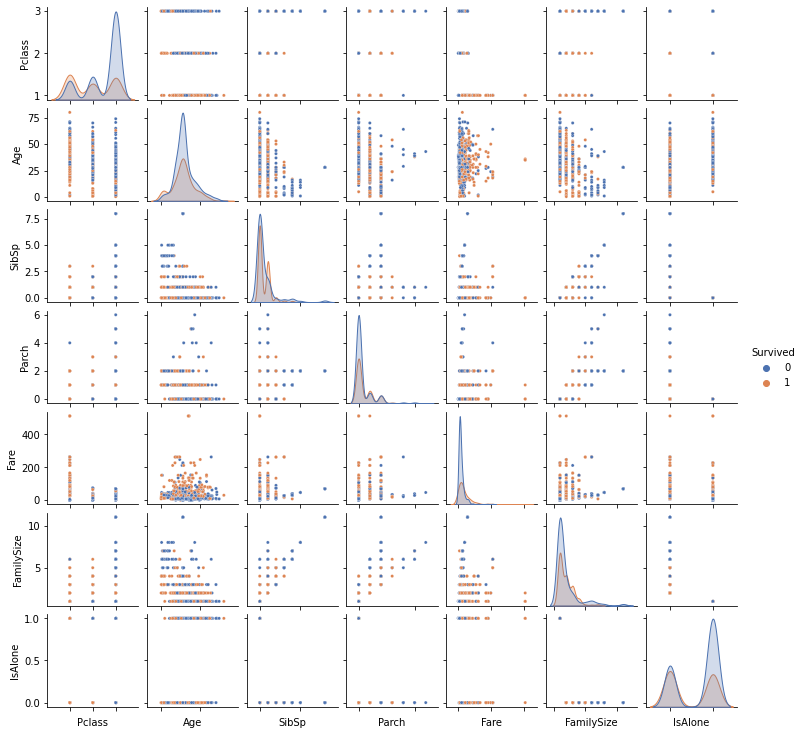

In [38]:
pp = sns.pairplot(df_drop, hue='Survived', palette='deep', height=1.5,
                  diag_kind='kde', diag_kws=dict(shade=True), plot_kws=dict(s=10))
pp.set(xticklabels=[])

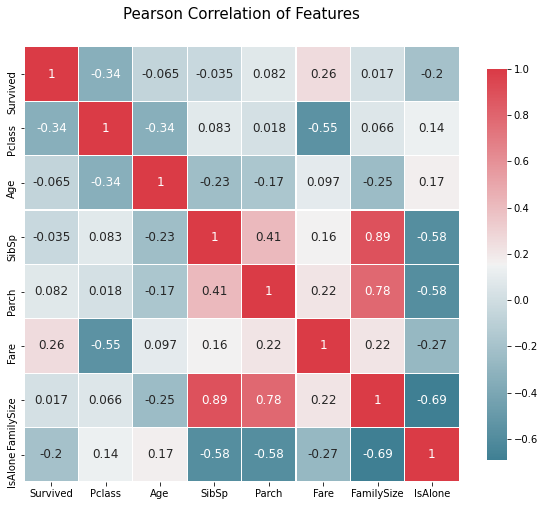

In [39]:
def correlation_heatmap(df):
    _, ax = plt.subplots(figsize=(10, 8))  # 设置画布大小

    colormap = sns.diverging_palette(220, 10, as_cmap=True)  # 设置画图颜色

    _ = sns.heatmap(          # 画出热图
        df.corr(),
        cmap=colormap,
        square=True,
        cbar_kws={'shrink': .9},
        ax=ax,
        annot=True,
        linewidths=0.1, vmax=1.0, linecolor='white',
        annot_kws={'fontsize': 12}
    )
    # 设置标题
    plt.title('Pearson Correlation of Features', y=1.05, size=15)


correlation_heatmap(df_drop)

In [41]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df_drop['Sex_Code'] = label.fit_transform(df_drop['Sex'])
df_drop['Embarked_Code'] = label.fit_transform(df_drop['Embarked'])
df_drop['Title_Code'] = label.fit_transform(df_drop['Title'])
df_drop['AgeBin_Code'] = label.fit_transform(df_drop['AgeBin'])
df_drop['FareBin_Code'] = label.fit_transform(df_drop['FareBin'])

In [42]:
df_drop.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,AgeBin,FareBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(16.0, 32.0]","(-0.001, 7.91]",1,2,3,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(32.0, 48.0]","(31.0, 512.329]",0,0,4,2,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(16.0, 32.0]","(7.91, 14.454]",0,2,2,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(32.0, 48.0]","(31.0, 512.329]",0,2,4,2,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(32.0, 48.0]","(7.91, 14.454]",1,2,3,2,1


In [43]:
feat_cols = ['Sex_Code', 'Pclass', 'Embarked_Code',
             'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
target = 'Survived'

In [44]:
data_X = df_drop[feat_cols]
data_X.head()

,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
0,1,3,2,3,2,1,0
1,0,1,0,4,2,2,3
2,0,3,2,2,1,1,1
3,0,1,2,4,2,2,3
4,1,3,2,3,1,2,1


In [45]:
data_y = df_drop[target]
data_y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [46]:
from sklearn import model_selection

train_x, test_x, train_y, test_y = model_selection.train_test_split(data_X.values,
                                                                    data_y.values,
                                                                    random_state=0)

In [47]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs')
model.fit(train_x, train_y)

LogisticRegression()

In [48]:
from sklearn import metrics
y_pred = model.predict(test_x)
metrics.accuracy_score(y_pred, test_y)

0.7982062780269058

In [49]:
from sklearn.svm import SVC

model = SVC(probability=True, gamma='auto')
model.fit(train_x, train_y)
y_pred = model.predict(test_x)
metrics.accuracy_score(y_pred, test_y)

0.8161434977578476

In [50]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(train_x, train_y)
y_pred = model.predict(test_x)
metrics.accuracy_score(y_pred, test_y)

0.8295964125560538